In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [20]:
traindata = pd.read_csv('./input/train.csv')
images = traindata.iloc[0:5000,1:]
labels = traindata.iloc[0:5000,:1]
train_images,test_images,train_labels,test_label = train_test_split(images,labels,test_size=0.2,random_state = 0)

Text(0.5,1,'label    6\nName: 3275, dtype: int64')

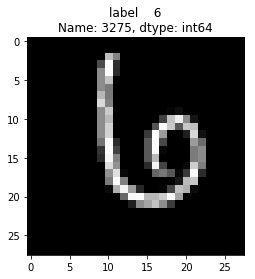

In [21]:
img = train_images.iloc[1].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[1])

(array([682.,   9.,  10.,   7.,  10.,  18.,   7.,  17.,   7.,  17.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

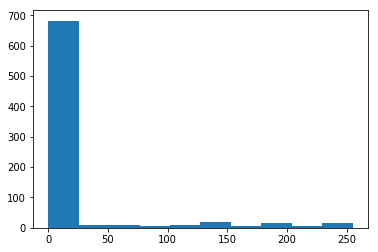

In [22]:
plt.hist(train_images.iloc[1])

In [23]:
traindata.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [24]:
clf = svm.SVC()
clf.fit(train_images,train_labels.values.ravel())
clf.score(test_images,test_label)

0.1

In [25]:
test_images[test_images>0] = 1
train_images[train_images>0]=1

Text(0.5,1,'label    6\nName: 3275, dtype: int64')

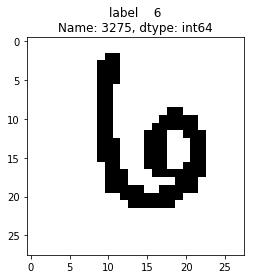

In [26]:
img = train_images.iloc[1].values.reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[1])

In [27]:
clf = svm.SVC()
clf.fit(train_images,train_labels.values.ravel())
clf.score(test_images,test_label)

0.887

In [28]:
testdata = pd.read_csv('./input/test.csv')
testdata[testdata>0]=1
result = clf.predict(testdata)

In [29]:
df = pd.DataFrame(result)
df.index.name = 'ImageId'
df.index += 1
df.columns = ['Label']
df.to_csv('result_mnist.csv',header=True)